In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

#Gráficos
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv(('./test.csv'))

traindex = train_data.index
testdex = test_data.index

In [3]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Uno los datos por medio de concat, los test data son los últimos 418 registros, es necesario resetear el índice para evitar valores duplicados

In [4]:
titanic = pd.concat([train_data, test_data],ignore_index=True)

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.duplicated().sum()

0

In [7]:
titanic.shape

(1309, 12)

Eliminamos el ID, el nombre y el ticket

In [8]:
titanic.drop(['PassengerId', 'Name','Ticket'], axis='columns',inplace=True)

Tambien se observa que los 418 registros que no tienen 'Survived' son los datos test

In [9]:
titanic.isnull().sum()

Survived     418
Pclass         0
Sex            0
Age          263
SibSp          0
Parch          0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Cabin     295 non-null    object 
 8   Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 92.2+ KB


In [11]:
titanic[titanic["Survived"].isna()]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
891,NaN,3,male,34.5,0,0,7.8292,NaN,Q
892,NaN,3,female,47.0,1,0,7.0000,NaN,S
893,NaN,2,male,62.0,0,0,9.6875,NaN,Q
894,NaN,3,male,27.0,0,0,8.6625,NaN,S
895,NaN,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
1304,NaN,3,male,NaN,0,0,8.0500,NaN,S
1305,NaN,1,female,39.0,0,0,108.9000,C105,C
1306,NaN,3,male,38.5,0,0,7.2500,NaN,S
1307,NaN,3,male,NaN,0,0,8.0500,NaN,S


### Indagamos qué información hay en las cabinas

Con la intención de revisar si las cabinas pueden tener alguna influencia en la sobrevivencia se reemplazan los Nan de la columna cabinas

In [12]:
cabinas =titanic.groupby('Cabin')['Pclass'].count()


In [13]:
cabinas = pd.pivot_table(titanic, values = 'Fare', index = ['Pclass'], columns =['Cabin'], aggfunc='count')

In [14]:
titanic['Cabin'].fillna('N', inplace=True)

In [15]:
titanic.loc[(titanic.Cabin != 'N')& (titanic.Pclass == 1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1.0,1,female,38.0,1,0,71.2833,C85,C
3,1.0,1,female,35.0,1,0,53.1000,C123,S
6,0.0,1,male,54.0,0,0,51.8625,E46,S
11,1.0,1,female,58.0,0,0,26.5500,C103,S
23,1.0,1,male,28.0,0,0,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...
1291,NaN,1,female,30.0,0,0,164.8667,C7,S
1295,NaN,1,male,43.0,1,0,27.7208,D40,C
1298,NaN,1,male,50.0,1,1,211.5000,C80,C
1302,NaN,1,female,37.0,1,0,90.0000,C78,Q


In [16]:
cabin_only = titanic[["Cabin"]].copy()

In [17]:
cabin_only["Deck"] = cabin_only["Cabin"].str.slice(0,1)

In [18]:
cabin_only["Room"] = cabin_only["Cabin"].str.slice(1,5).str.extract("([0-9]+)", expand=False).astype("float")

In [19]:
cabin_only

,Cabin,Deck,Room
0,N,N,NaN
1,C85,C,85.0
2,N,N,NaN
3,C123,C,123.0
4,N,N,NaN
...,...,...,...
1304,N,N,NaN
1305,C105,C,105.0
1306,N,N,NaN
1307,N,N,NaN


In [20]:
cabin_only['Deck'].value_counts()

N    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Deck, dtype: int64

In [21]:
titanic = titanic.join(cabin_only['Deck']).copy()

In [22]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck
0,0.0,3,male,22.0,1,0,7.2500,N,S,N
1,1.0,1,female,38.0,1,0,71.2833,C85,C,C
2,1.0,3,female,26.0,0,0,7.9250,N,S,N
3,1.0,1,female,35.0,1,0,53.1000,C123,S,C
4,0.0,3,male,35.0,0,0,8.0500,N,S,N


In [23]:
titanic.drop({'Cabin'}, axis = 'columns', inplace= True)

Se observa que la tercera clase está más asociada a las cabinas perdidas,  
La primera clase tiene un 20% de cabinas perdidas, la segunda 91% y la tercera 97%

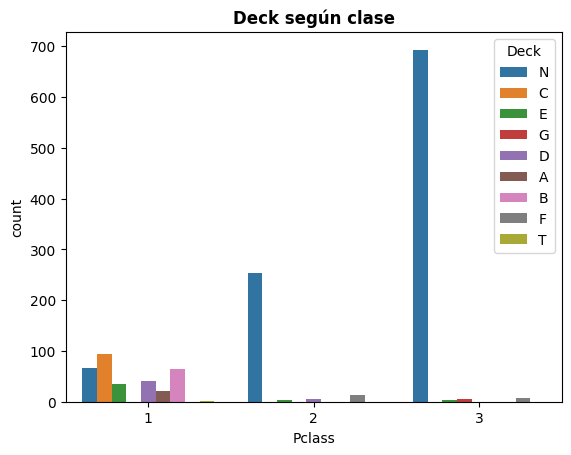

Deck,A,B,C,D,E,F,G,N,T
Pclass,,,,,,,,,
1,6.811146,20.123839,29.102167,12.383901,10.526316,0.000000,0.000000,20.743034,0.309598
2,0.000000,0.000000,0.000000,2.166065,1.444043,4.693141,0.000000,91.696751,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.423131,1.128350,0.705219,97.743300,0.000000


In [24]:
sns.countplot(x='Pclass', hue='Deck', data=titanic)
plt.title('Deck según clase', weight='bold')
plt.show()

table = pd.crosstab(titanic['Pclass'], titanic['Deck'], normalize='index')
table*100

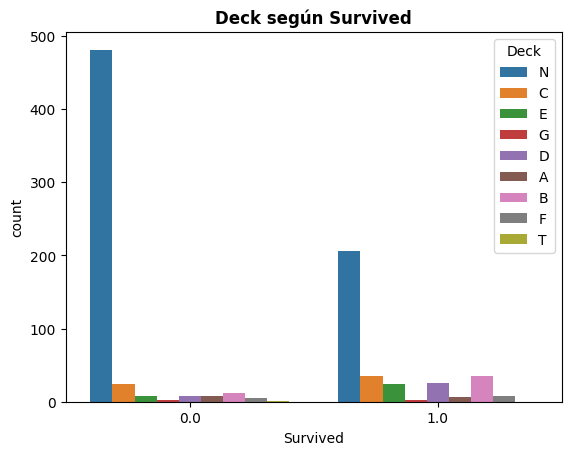

Deck,A,B,C,D,E,F,G,N,T
Survived,,,,,,,,,
0.0,8,12,24,8,8,5,2,481,1
1.0,7,35,35,25,24,8,2,206,0


In [25]:
sns.countplot(x='Survived', hue='Deck', data=titanic)
plt.title('Deck según Survived', weight='bold')
plt.show()

table = pd.crosstab(titanic['Survived'], titanic['Deck'])
table


### Indagamos sobre la variable Embarked

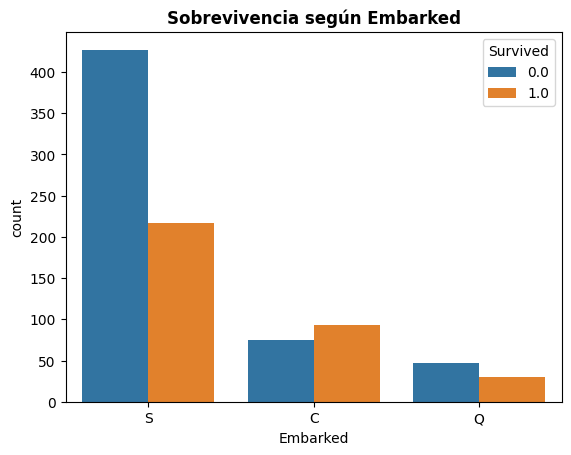

Survived,0.0,1.0
Embarked,,
C,44.642857,55.357143
Q,61.038961,38.961039
S,66.304348,33.695652


In [26]:
sns.countplot(x='Embarked', hue='Survived', data=titanic)
plt.title('Sobrevivencia según Embarked', weight='bold')
plt.show()

table = pd.crosstab(titanic['Embarked'], titanic['Survived'], normalize='index')
table*100

### Indagamos sobre la edad

In [27]:
age_null = titanic[titanic.Age.isnull()]

Los de tercera clase son los que tienen la mayor cantidad de registros de edad perdido +  
el máximo de relaciones de padres/hijos 8 (parch) y máximo de esposo(a)/hermano 9

In [28]:
age_null.groupby('Pclass')[('SibSp','Parch')].describe()

C:\Users\cj_li\AppData\Local\Temp\ipykernel_3388\1580944037.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  age_null.groupby('Pclass')[('SibSp','Parch')].describe()


SibSp                                               Parch            \
        count      mean       std  min  25%  50%  75%  max  count      mean   
Pclass                                                                        
1        39.0  0.153846  0.365518  0.0  0.0  0.0  0.0  1.0   39.0  0.025641   
2        16.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   16.0  0.000000   
3       208.0  0.581731  1.607066  0.0  0.0  0.0  0.0  8.0  208.0  0.302885   

                                           
             std  min  25%  50%  75%  max  
Pclass                                     
1       0.160128  0.0  0.0  0.0  0.0  1.0  
2       0.000000  0.0  0.0  0.0  0.0  0.0  
3       1.058479  0.0  0.0  0.0  0.0  9.0

Veamos como se comporta la edad y la sobrevivencia.  
Para esto será necesario categorizar la edad.  
Se tiene 263 datos de edad perdidos, se tratarán por medio de imputación según el vecino más cercano

In [29]:
#Creamos 8 intervalos
rango = titanic['Age'].max() - titanic['Age'].min()
largo_intervalo = int(np.round(rango / 8))

In [30]:
#Calculamos los límites inferiores y superirores de los intervalos

limite_inferior = int(np.floor( titanic['Age'].min()))
limite_superior = int(np.floor( titanic['Age'].max()))

#Creamos la lista de intervalos
total_intervalos = [i for i in range(limite_inferior, limite_superior+largo_intervalo, largo_intervalo)]

In [31]:
total_intervalos

[0, 10, 20, 30, 40, 50, 60, 70, 80]

In [32]:
#Etiquetas de los intervalos
etiquetas_intervalos = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80']

In [33]:
titanic['Age_intervalo'] = pd.cut(x=titanic['Age'], bins=total_intervalos, labels=etiquetas_intervalos, include_lowest=True)

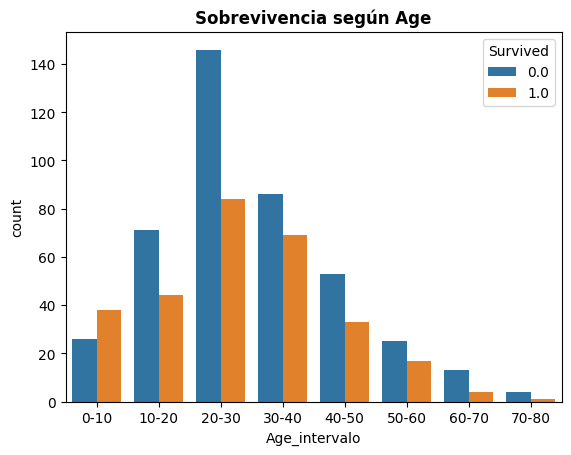

Survived,0.0,1.0
Age_intervalo,,
0-10,40.625000,59.375000
10-20,61.739130,38.260870
20-30,63.478261,36.521739
30-40,55.483871,44.516129
40-50,61.627907,38.372093
50-60,59.523810,40.476190
60-70,76.470588,23.529412
70-80,80.000000,20.000000


In [34]:
sns.countplot(x='Age_intervalo', hue='Survived', data=titanic)
plt.title('Sobrevivencia según Age', weight='bold')
plt.show()

table = pd.crosstab(titanic['Age_intervalo'], titanic['Survived'], normalize='index')
table*100

Ahora veremos como se relaciona la edad con la Clase

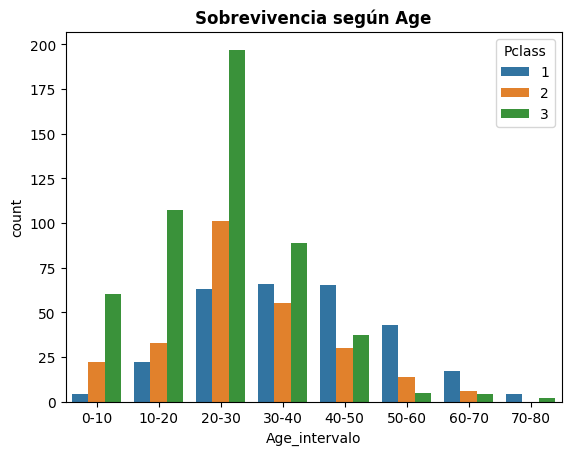

Pclass,1,2,3
Age_intervalo,,,
0-10,4.651163,25.581395,69.767442
10-20,13.580247,20.370370,66.049383
20-30,17.451524,27.977839,54.570637
30-40,31.428571,26.190476,42.380952
40-50,49.242424,22.727273,28.030303
50-60,69.354839,22.580645,8.064516
60-70,62.962963,22.222222,14.814815
70-80,66.666667,0.000000,33.333333


In [35]:
sns.countplot(x='Age_intervalo', hue='Pclass', data=titanic)
plt.title('Sobrevivencia según Age', weight='bold')
plt.show()

table = pd.crosstab(titanic['Age_intervalo'], titanic['Pclass'], normalize='index')
table*100

### Revisamos la variable Deck

<AxesSubplot: xlabel='Deck', ylabel='Age'>

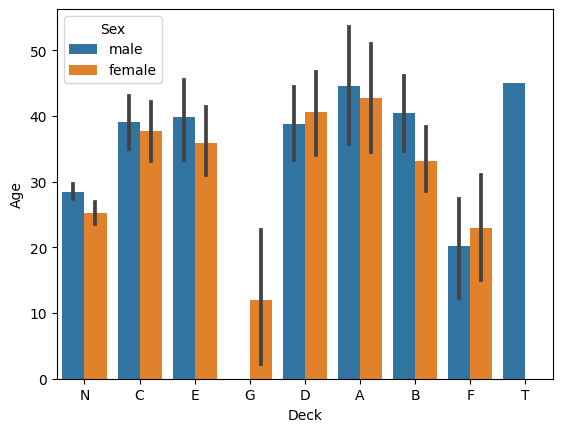

In [36]:
sns.barplot(x='Deck', y='Age', hue ='Sex', data=titanic)

In [37]:
titanic_2 = titanic.copy()

In [38]:
titanic = titanic_2.copy()

In [39]:
titanic_sin_N = titanic.query("Deck != 'N'")

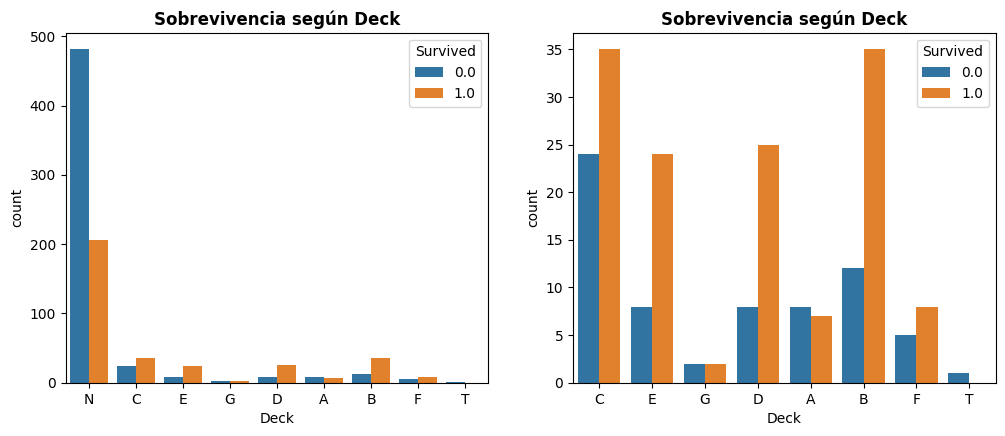

Survived,0.0,1.0
Deck,,
A,53.333333,46.666667
B,25.531915,74.468085
C,40.677966,59.322034
D,24.242424,75.757576
E,25.000000,75.000000
F,38.461538,61.538462
G,50.000000,50.000000
N,70.014556,29.985444
T,100.000000,0.000000


In [40]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.countplot(x='Deck', hue='Survived', data=titanic)
plt.title('Sobrevivencia según Deck', weight='bold')

plt.subplot(2,2,2)
sns.countplot(x='Deck', hue='Survived', data=titanic_sin_N)
plt.title('Sobrevivencia según Deck', weight='bold')

plt.show()

table = pd.crosstab(titanic['Deck'], titanic['Survived'], normalize='index')
table*100

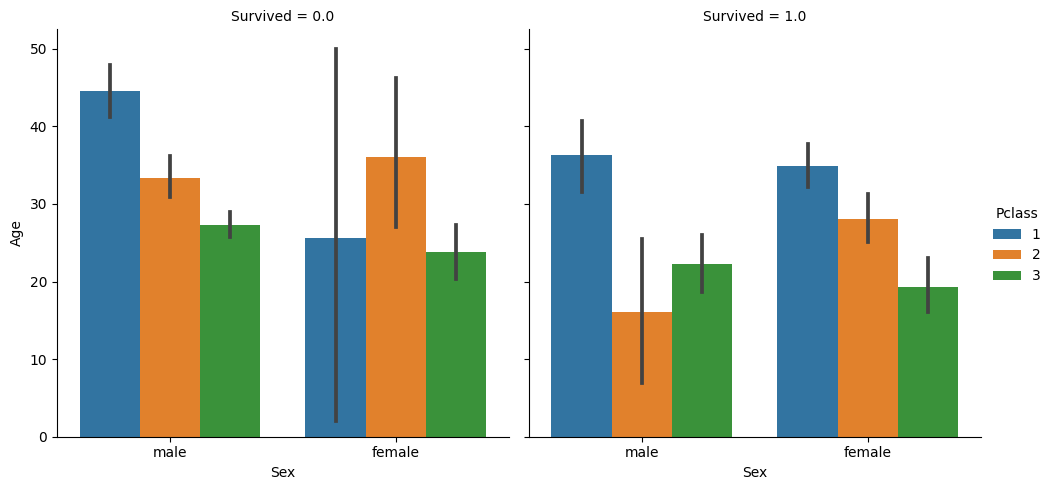

In [41]:
sns.catplot(x="Sex", y="Age", hue="Pclass", col="Survived", data=titanic, kind="bar")

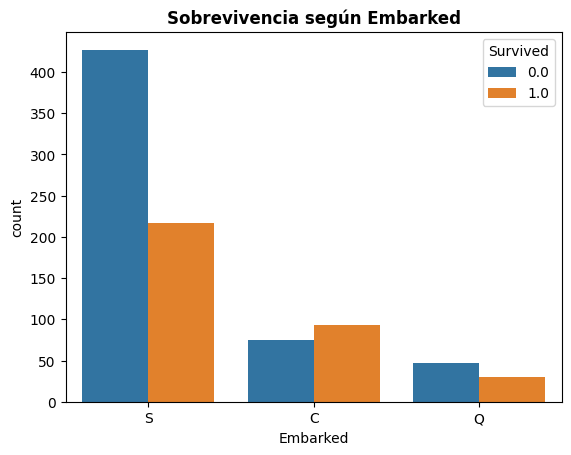

Survived,0.0,1.0
Embarked,,
C,44.642857,55.357143
Q,61.038961,38.961039
S,66.304348,33.695652


In [42]:
sns.countplot(x='Embarked', hue='Survived', data=titanic)
plt.title('Sobrevivencia según Embarked', weight='bold')
plt.show()

table = pd.crosstab(titanic['Embarked'], titanic['Survived'], normalize='index')
table*100

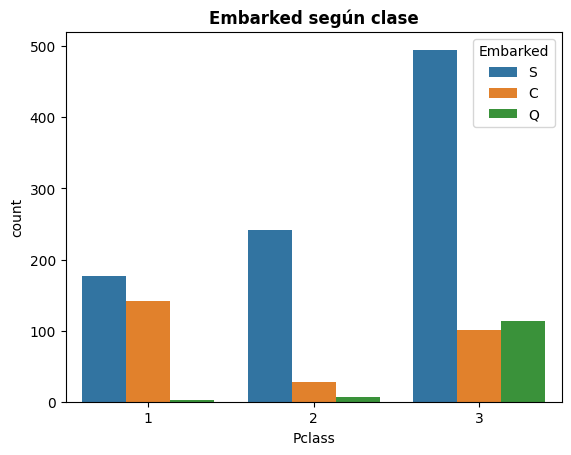

Embarked,C,Q,S
Pclass,,,
1,43.925234,0.934579,55.140187
2,10.108303,2.527076,87.364621
3,14.245416,15.937941,69.816643


In [43]:
sns.countplot(x='Pclass', hue='Embarked', data=titanic)
plt.title('Embarked según clase', weight='bold')
plt.show()

table = pd.crosstab(titanic['Pclass'], titanic['Embarked'], normalize='index')
table*100

Vemos como se comporta la supervivencia de las personas según tenian familia o venian solos

In [44]:
titanic.groupby(['Survived', 'SibSp', 'Parch'])['Survived'].count().unstack().fillna('-')

Parch               0     1     2    4    5    3    6
Survived SibSp                                       
0.0      0      374.0  13.0   8.0  1.0  2.0    -    -
         1       59.0  23.0   7.0  3.0  2.0  2.0  1.0
         2       12.0   1.0   2.0    -    -    -    -
         3          -   7.0   5.0    -    -    -    -
         4          -   9.0   6.0    -    -    -    -
         5          -     -   5.0    -    -    -    -
         8          -     -   7.0    -    -    -    -
1.0      0      163.0  25.0  21.0    -    -  1.0    -
         1       64.0  34.0  12.0    -  1.0  1.0    -
         2        4.0   6.0   2.0    -    -  1.0    -
         3        2.0     -   2.0    -    -    -    -
         4          -     -   3.0    -    -    -    -

Se crea la columna que indica si la persona tiene familia (1) o iba sola (0)

In [45]:
titanic['Family'] = np.where(((titanic['Parch'] > 0) & (titanic['SibSp'] > 0)), 1, 0)

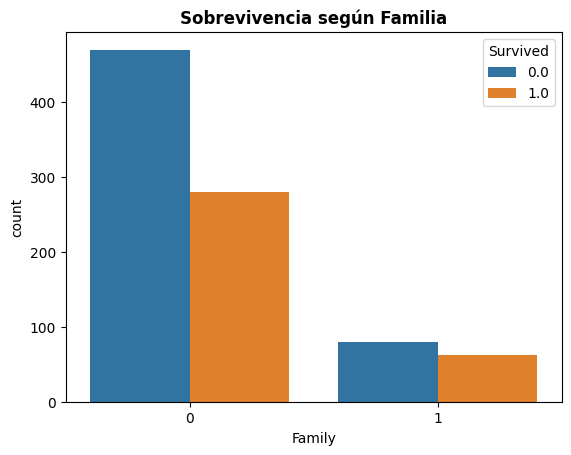

Survived,0.0,1.0
Family,,
0,0.626168,0.373832
1,0.563380,0.436620


In [46]:
sns.countplot(x='Family', hue='Survived', data=titanic)
plt.title('Sobrevivencia según Familia', weight='bold')
plt.show()

table = pd.crosstab(titanic['Family'], titanic['Survived'], normalize='index')
table

### Resumen del EDA mediante gráfica

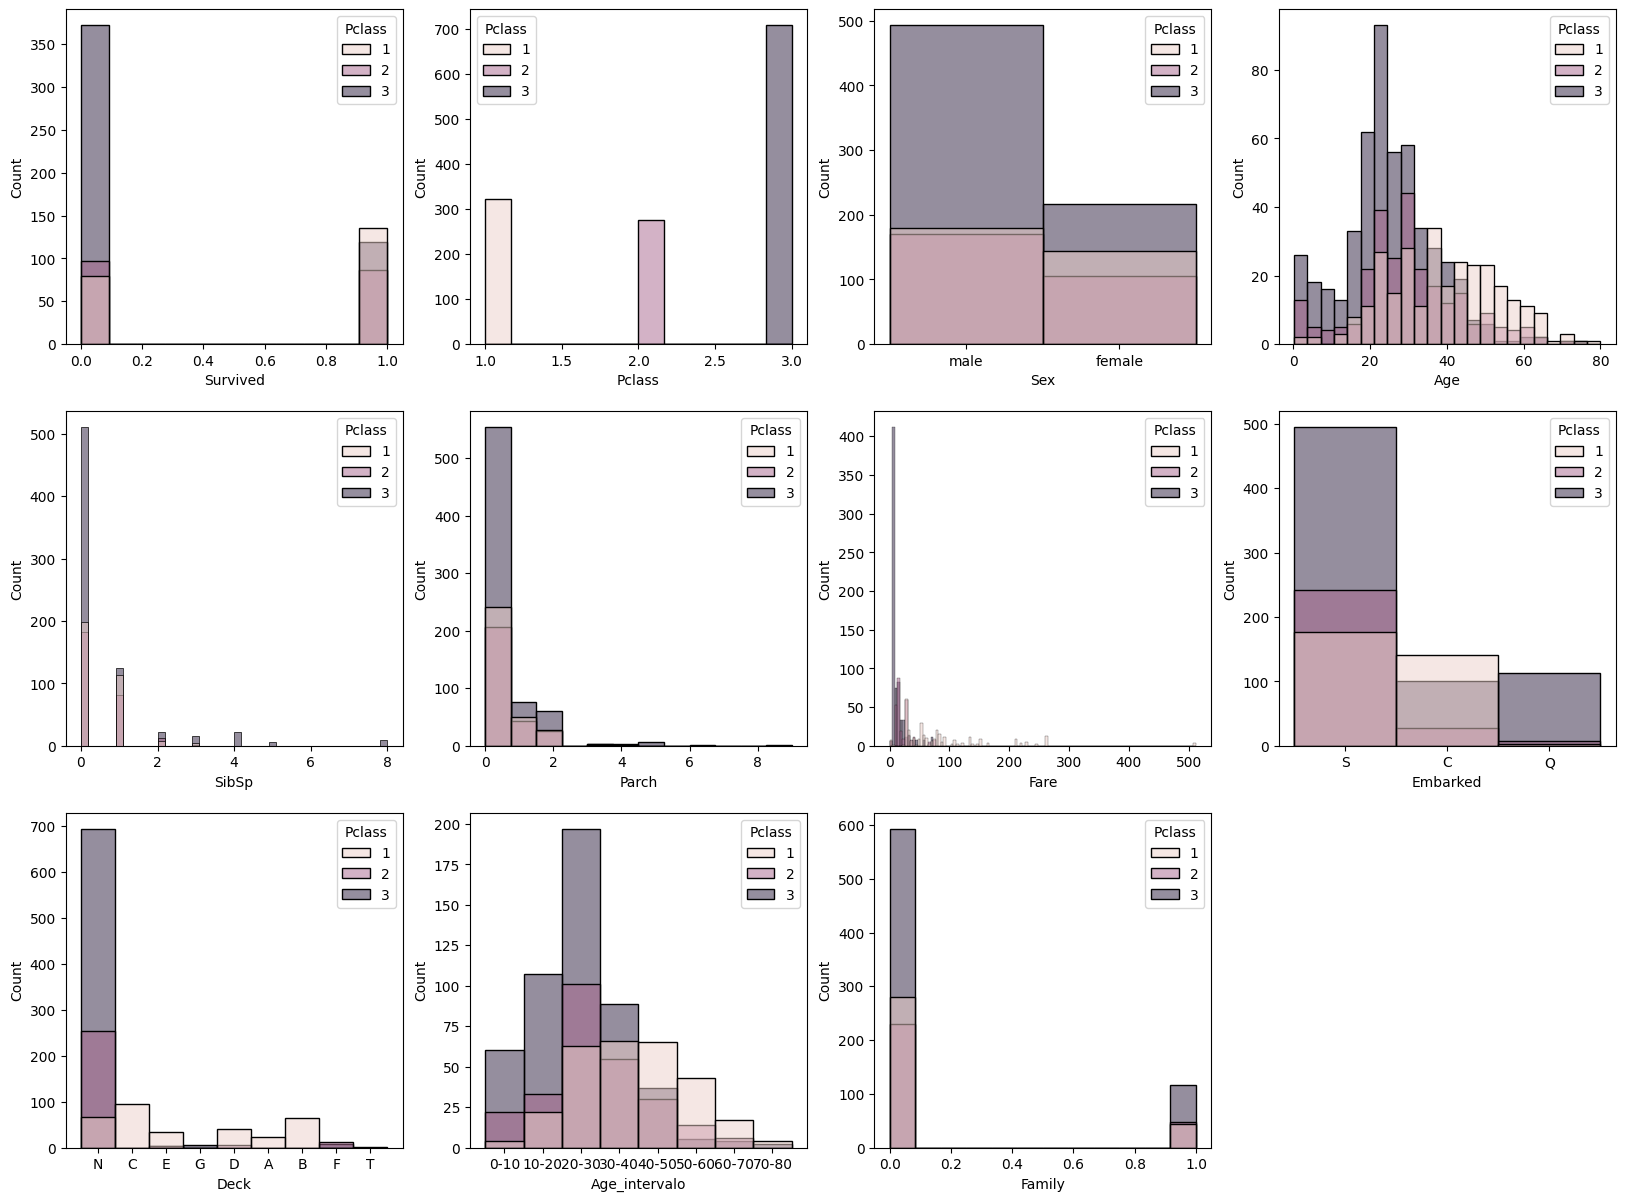

In [47]:
plt.figure(figsize=(20,20))
for i, v in enumerate(titanic):
    plt.subplot(4,4,i+1)
    sns.histplot(x = v , data = titanic, hue='Pclass')
    
plt.show()

### Tratamiento de MV

In [48]:
titanic.isnull().sum()

Survived         418
Pclass             0
Sex                0
Age              263
SibSp              0
Parch              0
Fare               1
Embarked           2
Deck               0
Age_intervalo    263
Family             0
dtype: int64

Se observa que la mayor cantidad de datos perdidos están en la variable Age, omitiendo la variable objetivo 'Survived'.  
Partiremos con la edad, primera aproximación, imputar la edad por el promedio de la clase

In [49]:
titanic.groupby('Pclass')['Age'].mean()

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [50]:
class_age = {1:39, 2:29, 3:25}

In [51]:
def fill_age(columns):
    age = columns[0]
    pclass = np.int64(columns[1])
    return class_age[pclass] if pd.isnull(age) else age

In [52]:
titanic['Age_median'] = titanic[['Age', 'Pclass']].apply(fill_age, axis=1)

Se observa que altera la curva de distribución

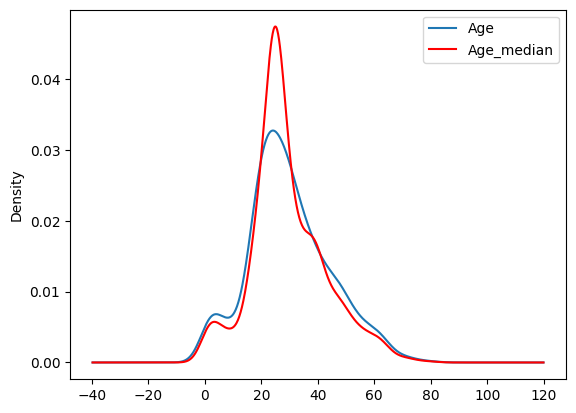

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)

titanic['Age'].plot(kind='kde', ax=ax)

titanic['Age_median'].plot(kind='kde', ax=ax, color='red')


lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Para imputar las variables faltantes, aplicaré una imputación según el vecino más cercano.  
El algoritmo trabaja con distancias, por lo tanto, es aplicar un encoder y estandarizar las variables.  
Primero imputamos las otras variables faltantes

In [54]:
#Fare según el promedio de la clase
titanic.groupby('Pclass')['Fare'].mean()

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

In [55]:
class_fare = {1:87.508992, 2:21.179196, 3:13.302889}

In [56]:
def fill_fare(columns):
    fare = columns[0]
    pclass = np.int64(columns[1])
    return class_fare[pclass] if pd.isnull(fare) else fare

In [57]:
titanic['Fare'] = titanic[['Fare', 'Pclass']].apply(fill_fare, axis=1)

In [58]:
titanic.groupby('Pclass')['Embarked'].describe()

,count,unique,top,freq
Pclass,,,,
1,321,3,S,177
2,277,3,S,242
3,709,3,S,495


In [59]:
#Embarked según el dato que ma´s se repite
titanic['Embarked']= titanic['Embarked'].fillna('S')

Antes de hacer el encoder, debemos aislar la variable objetivo

In [60]:
titanic_y = pd.DataFrame(titanic['Survived'])
titanic.drop(['Survived', 'Age_intervalo','SibSp','Parch','Age_median'], axis='columns',inplace=True)

### Aplicación de Encoder_1 con LabelEncoder

In [61]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [62]:
titanic_cat = titanic.select_dtypes(include=['object', 'category'])

In [63]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','uint8']
titanic_num= titanic.select_dtypes(include=numerics)
print(titanic_num.shape)
titanic_num.head()

(1309, 4)


,Pclass,Age,Fare,Family
0,3,22.0,7.2500,0
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,0


In [64]:
labels_cat = preprocessing.LabelEncoder()
train_titanic_enc = titanic_cat.apply(labels_cat.fit_transform)
train_titanic_enc.head(5)

,Sex,Embarked,Deck
0,1,2,7
1,0,0,2
2,0,2,7
3,0,2,2
4,1,2,7


In [65]:
titanic_enc = pd.concat([titanic_num,train_titanic_enc], ignore_index=True, axis = 1)
titanic_enc.columns = titanic_num.columns.tolist() + titanic_cat.columns.tolist()
titanic_enc.head()

,Pclass,Age,Fare,Family,Sex,Embarked,Deck
0,3,22.0,7.2500,0,1,2,7
1,1,38.0,71.2833,0,0,0,2
2,3,26.0,7.9250,0,0,2,7
3,1,35.0,53.1000,0,0,2,2
4,3,35.0,8.0500,0,1,2,7


In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler().fit(titanic_enc)
titanic_esc = pd.DataFrame(scaler.transform(titanic_enc))
titanic_esc.columns = titanic_enc.columns.tolist() 
titanic_esc.head()

,Pclass,Age,Fare,Family,Sex,Embarked,Deck
0,0.841916,-0.547050,-0.503271,-0.432161,0.743497,0.622279,0.507835
1,-1.546098,0.563552,0.734756,-0.432161,-1.344995,-1.834926,-1.923608
2,0.841916,-0.269400,-0.490220,-0.432161,-1.344995,0.622279,0.507835
3,-1.546098,0.355314,0.383198,-0.432161,-1.344995,0.622279,-1.923608
4,0.841916,0.355314,-0.487804,-0.432161,0.743497,0.622279,0.507835


In [68]:
titanic_esc.isnull().sum()

Pclass        0
Age         263
Fare          0
Family        0
Sex           0
Embarked      0
Deck          0
dtype: int64

### En este punto, probaré imputar los MV de edad por medio de KNNImputer

In [69]:
from sklearn.impute import KNNImputer

In [70]:
# Crear un imputador KNN
imputer = KNNImputer(n_neighbors=3, weights='distance', metric='nan_euclidean')

# Imputar los valores perdidos en los datos
titanic_imputed = imputer.fit_transform(titanic_esc)

In [71]:
titanic_imputed = pd.DataFrame(titanic_imputed, columns=titanic_esc.columns)

In [72]:
titanic_imputed['Age_original'] = titanic_esc['Age']

Se observa que la imputación no alteró demasiado la curva de distribución

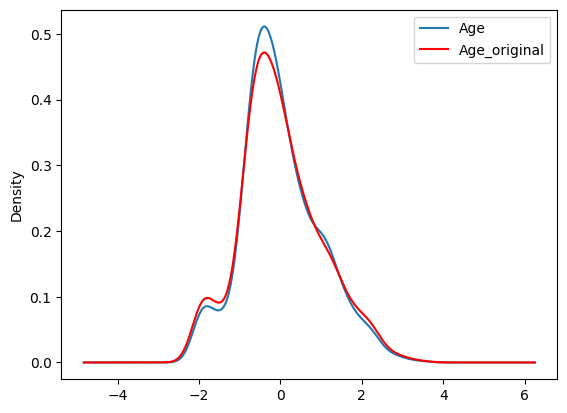

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111)

titanic_imputed['Age'].plot(kind='kde', ax=ax)

titanic_imputed['Age_original'].plot(kind='kde', ax=ax, color='red')


lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## Modelamiento

### Separación de muestras

Separaré las muestras:  

En primer lugar almacenaré los datos con edad faltante y los trataré como datos target.  
Posteriormente, eliminaré los registros faltantes del dataframe prinpcipal y lo trataré como subdata, con la cual haré testeo y entrenamiento

In [ ]:
titanic_imputed.drop(['Age_original'], axis='columns',inplace=True)

In [91]:
titanic = pd.concat([titanic_y,titanic_imputed], ignore_index=True, axis = 1)
columnas = list(titanic_y.columns) + list(titanic_imputed.columns)
titanic.columns = columnas

In [92]:
titanic.head()

,Survived,Pclass,Age,Fare,Family,Sex,Embarked,Deck
0,0.0,0.841916,-0.547050,-0.503271,-0.432161,0.743497,0.622279,0.507835
1,1.0,-1.546098,0.563552,0.734756,-0.432161,-1.344995,-1.834926,-1.923608
2,1.0,0.841916,-0.269400,-0.490220,-0.432161,-1.344995,0.622279,0.507835
3,1.0,-1.546098,0.355314,0.383198,-0.432161,-1.344995,0.622279,-1.923608
4,0.0,0.841916,0.355314,-0.487804,-0.432161,0.743497,0.622279,0.507835


In [94]:
titanic.isna().sum()

Survived    418
Pclass        0
Age           0
Fare          0
Family        0
Sex           0
Embarked      0
Deck          0
dtype: int64

In [78]:
titanic.to_csv('titanic.csv',index=False)

In [95]:
#Cargar el dataframe con el preprocesamiento listo
titanic =pd.read_csv('titanic.csv')

Preparar el test y train data

In [96]:
titanic_test = titanic[titanic.Survived.isnull()]
titanic_test = titanic_test.drop(['Survived'], axis='columns')
titanic_test.head()

,Pclass,Age,Fare,Family,Sex,Embarked,Deck
891,0.841916,0.320607,-0.492073,-0.432161,0.743497,-0.606323,0.507835
892,0.841916,1.188265,-0.508104,-0.432161,-1.344995,0.622279,0.507835
893,-0.352091,2.229454,-0.456144,-0.432161,0.743497,-0.606323,0.507835
894,0.841916,-0.199987,-0.475961,-0.432161,0.743497,0.622279,0.507835
895,0.841916,-0.547050,-0.405875,2.313951,-1.344995,0.622279,0.507835


In [97]:
titanic_train = titanic.dropna()

In [98]:
titanic_train_X = titanic_train.drop(['Survived'], axis='columns')
titanic_train_y = pd.DataFrame(titanic_train['Survived'])

In [99]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 891 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    float64
 1   Age       418 non-null    float64
 2   Fare      418 non-null    float64
 3   Family    418 non-null    float64
 4   Sex       418 non-null    float64
 5   Embarked  418 non-null    float64
 6   Deck      418 non-null    float64
dtypes: float64(7)
memory usage: 26.1 KB


## Probar modelos

### División de datos

In [84]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(titanic_train_X, titanic_train_y, test_size=0.2, random_state=2023)

In [121]:
#Librerías de keras
import tensorflow as tf
layers = tf.keras.layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout
from tensorflow.keras.optimizers import SGD #(stochastic gradien descent) 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import regularizers

In [102]:
#Métricas de predicciones
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [103]:
X_train.shape[1]

7

In [174]:
# modelo 1
# aplicar regularizadores L1 y L2

model1 = Sequential()
model1.add(Dense(32, input_shape=(X_train.shape[1],), kernel_initializer='normal', activation='LeakyReLU'))
model1.add(Dense(128, kernel_initializer='normal', kernel_regularizer=regularizers.L1L2(l1=1e-4, l2=1e-3), activation='LeakyReLU'))
model1.add(Dropout(0.1))
model1.add(Dense(128, kernel_initializer='normal', kernel_regularizer=regularizers.L1L2(l1=1e-4, l2=1e-3), activation='LeakyReLU'))
model1.add(Dropout(0.1))
model1.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

optimizer = tf.keras.optimizers.Adamax(learning_rate=0.0001)
model1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) 

early_stopping_monitor =  EarlyStopping(patience=10)
history1 = model1.fit(X_train, y_train, batch_size=10, epochs=500, verbose=2, validation_split=0.2, callbacks = [early_stopping_monitor])

Epoch 1/500
57/57 - 3s - loss: 2.5153 - accuracy: 0.7118 - val_loss: 2.4269 - val_accuracy: 0.8112 - 3s/epoch - 55ms/step
Epoch 2/500
57/57 - 1s - loss: 2.3567 - accuracy: 0.7364 - val_loss: 2.2697 - val_accuracy: 0.7972 - 918ms/epoch - 16ms/step
Epoch 3/500
57/57 - 1s - loss: 2.2095 - accuracy: 0.7417 - val_loss: 2.1189 - val_accuracy: 0.7972 - 1s/epoch - 20ms/step
Epoch 4/500
57/57 - 1s - loss: 2.0701 - accuracy: 0.7522 - val_loss: 1.9777 - val_accuracy: 0.8252 - 1s/epoch - 19ms/step
Epoch 5/500
57/57 - 1s - loss: 1.9426 - accuracy: 0.7715 - val_loss: 1.8508 - val_accuracy: 0.8252 - 1s/epoch - 19ms/step
Epoch 6/500
57/57 - 1s - loss: 1.8306 - accuracy: 0.7698 - val_loss: 1.7415 - val_accuracy: 0.8182 - 930ms/epoch - 16ms/step
Epoch 7/500
57/57 - 1s - loss: 1.7324 - accuracy: 0.7873 - val_loss: 1.6460 - val_accuracy: 0.8252 - 1s/epoch - 18ms/step
Epoch 8/500
57/57 - 1s - loss: 1.6478 - accuracy: 0.7856 - val_loss: 1.5638 - val_accuracy: 0.8322 - 1s/epoch - 20ms/step
Epoch 9/500
57/57 

In [175]:
train_loss = history1.history['loss']
val_loss = history1.history['val_loss']

Text(0.5, 1.0, 'Pérdida')

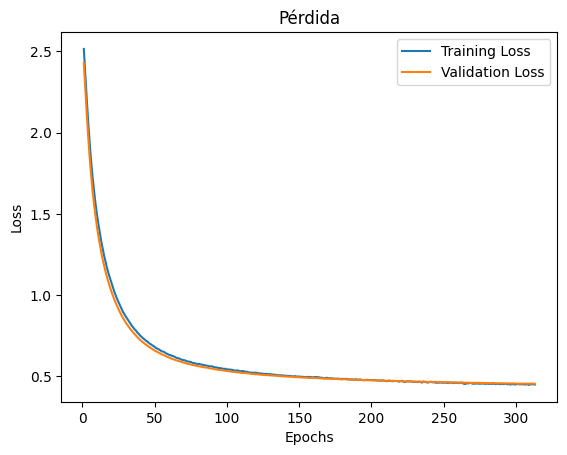

In [176]:
epochs = list(range(1, len(train_loss) + 1))

#Plotear la función de pérdida de entrenamiento y validación

plt.plot(epochs, train_loss, label = 'Training Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Pérdida')

In [177]:
threshold = 0.5
y_pred = model1.predict(X_test)

y_pred_bin = (y_pred >= threshold).astype(int)

print(classification_report(y_test, y_pred_bin))
print(confusion_matrix(y_test, y_pred_bin))

6/6 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       113
         1.0       0.79      0.70      0.74        66

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179

[[101  12]
 [ 20  46]]


In [ ]:
# Hacer predicciones en el conjunto de prueba con el modelo ensamblado 1
threshold = 0.5
y_pred = best_model.predict(test_esc)

y_pred_bin = (y_pred >= threshold).astype(int)

In [ ]:
y_pred_bin = pd.DataFrame(y_pred_bin)
columnas = ['Survived']
y_pred_bin.columns = columnas

In [ ]:
y_pred_bin.info()

In [ ]:
y_pred_bin.value_counts()

In [ ]:
test_data = pd.read_csv('./test.csv')
id = pd.DataFrame(test_data['PassengerId'])

In [ ]:
predic

In [ ]:
predic.to_csv('submission_CL_21.csv', index=False)

### Probaré realizar un Pipeline que reduce que optimiza el modelo mediante la reducción de variables con K-Means

Probar:  
Eliminar Deck, luego aplicar KNN  
Regresión Logística  
Considerar solo variables categóricas  

12.06.2023 El ensamblado_1 obtuvo una puntuación dfe 0.7775 en Kaggle, mejor hasta el momento

19-06-2023  
Tengo la impresión de que los modelos están sobreajustados por la pasada de características del data set de prueba.  
Próximo paso trabajar las muestras 100% por separado